![jupyter](./tasks/task3.png)
![jupyter](./tasks/task3-var-1.png)
![jupyter](./tasks/task3-var-2.png)

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sb
from prettytable import PrettyTable
from scipy.stats import chi2

np.set_printoptions(precision=3, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)
    
n = 120

$Плотность \spaceи\space функция\space распределения \spaceхи-квадрат\space$

![jupyter](./pictures/p_chi2.png)
![jupyter](./pictures/F_chi2.png)

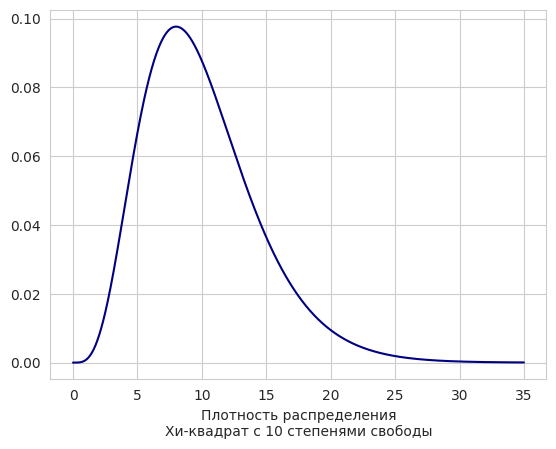

In [2]:
x = np.arange(0, 35, 0.001)
p_chi2 = chi2.pdf(x, df=10)
F = chi2.cdf(x, df=10)

sb.set_style("whitegrid")
plt.plot(x, p_chi2, color='navy')
plt.xlabel('Плотность распределения\nХи-квадрат с 10 степенями свободы')
plt.show()

In [3]:
Y = np.array([])
for i in range(n):
    Y = np.append(Y, random.random())

X = np.array([])
for i in range(n):
    X = np.append(X, chi2.ppf(Y[i], df=10))
print("Смоделированный массив X =")
print(X)

Смоделированный массив X =
[13.397 11.023  8.313  5.545 18.47   5.906 13.834  9.554  4.53  12.416
  7.41   7.374 14.152  6.873 20.076  7.66  17.129 12.404 19.223  4.777
  8.17  10.314 16.368 14.965  8.459  7.426  9.457 13.349 14.759  6.623
  9.197  9.769  7.895 11.349 14.254 10.749 10.287 11.517  9.919  4.013
 15.932 20.31   5.204  7.412  5.776 19.624  6.602 13.494  9.506 10.639
 11.841 11.016 14.207  6.898  6.712 11.011 10.11   2.979  9.332 13.183
  6.283 15.432  3.728  5.021  5.98   7.933  8.067 15.886  5.971  8.456
  8.488 10.384 13.767 11.657 10.837 18.215  5.698 10.579  4.387 14.253
  5.976 11.833  4.994  3.919  6.864  7.643 10.547 13.17  21.261 14.283
 12.255  9.251 14.67   6.765  8.279  6.848  4.667  9.417  9.192  5.266
  8.58  17.059 11.978  7.854  6.619 11.987  5.806  6.811  9.166  7.873
 13.35   2.386  9.829  9.509 11.974  7.383  8.829  3.989  4.341  4.497]


In [4]:
Max = np.amax(X)
Min = np.amin(X)
w = Max - Min

print("Находим крайние члены вариационного ряда и размах выборки\n")
print("Размер n = %d\nКрайние члены вариационного ряда max = %.3f, min = %.5f\nРазмах выборки w = %f" 
      %(n, Max, Min, w))

Находим крайние члены вариационного ряда и размах выборки

Размер n = 120
Крайние члены вариационного ряда max = 21.261, min = 2.38607
Размах выборки w = 18.874666


In [5]:
l = math.trunc(1 + math.log2(n))
h = w / l

print("Осуществляем группировку данных\n")

print("Число интервалов l = %d\nШаг(ширина интервалов группировки) h = %f" %(l, h))

hist, bin_edges = np.histogram(X, l)
bin_edges_average = np.zeros(bin_edges[:7].size)
for i in range (l):
    bin_edges_average[i] = (bin_edges[i] + bin_edges[i + 1]) / 2 
f1 = bin_edges_average
f2 = hist

print("\n")
th = ["Cредние значения каждого из  интервалов", "Частоты попадания элементов в каждый из интервалов"]
td = np.array(f1[0])
for i in range(len(f1)-1):
    td = np.append(td, f2[i])
    td = np.append(td, f1[i+1])
td = np.append(td, f2[6])
print_table(th, td)

p = hist / n

Int = f1
intl = Int - h / 2
intl = np.append(intl, Max)

print("\n")
th = ["Интервал", "Середина интервала int", "Частота f2", "Относительная частота p"]
td = []
for i in range(l):
    td.append("["+str(round(intl[i], 4))+","+str(round(intl[i + 1], 4))+")")
    td.append(round(Int[i], 4))
    td.append(f2[i])
    td.append(round(p[i], 4))
print_table(th, np.array(td))

Осуществляем группировку данных

Число интервалов l = 7
Шаг(ширина интервалов группировки) h = 2.696381


+-----------------------------------------+----------------------------------------------------+
| Cредние значения каждого из  интервалов | Частоты попадания элементов в каждый из интервалов |
+-----------------------------------------+----------------------------------------------------+
|            3.734261281275655            |                        14.0                        |
|            6.430642181519172            |                        28.0                        |
|             9.12702308176269            |                        30.0                        |
|            11.823403982006207           |                        20.0                        |
|            14.519784882249725           |                        16.0                        |
|            17.216165782493242           |                        7.0                         |
|            19.91254

По сгруппированным данным строим гистограмму относительных частот



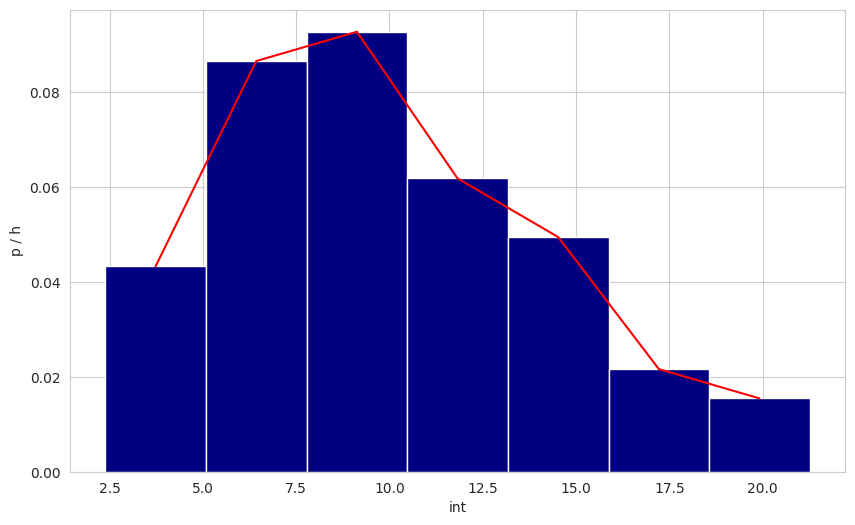

In [6]:
print("По сгруппированным данным строим гистограмму относительных частот\n")

sb.set_style("whitegrid")
plt.figure(figsize=(10,6))
xx = Int
yy = p / h
plt.bar(xx, yy, width=h, color='navy')
plt.plot(xx, yy, color='red')
plt.xlabel("int")
plt.ylabel("p / h")
plt.show()

In [7]:
print("Вычисляем выборочное среднее и выборочную дисперсию\n")

xm = sum(X) / n
s2 = sum((X[i] - xm) ** 2 for i in range(n)) / (n - 1)
print("Выброчное среднее xm =", round(xm, 5))
print("Выборочная дисперсия s2 =", round(s2, 5))

Вычисляем выборочное среднее и выборочную дисперсию

Выброчное среднее xm = 9.9053
Выборочная дисперсия s2 = 17.40531


Строим совмещенные графики гистограммы и плотности предполагаемого закона



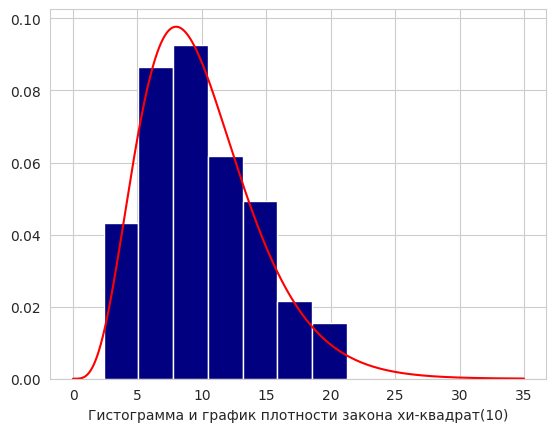

In [8]:
print("Строим совмещенные графики гистограммы и плотности предполагаемого закона\n")

sb.set_style("whitegrid")
plt.plot(x, p_chi2, color='red')
plt.xlabel('Гистограмма и график плотности закона хи-квадрат(10)')
xx = Int
yy = p / h
plt.bar(xx, yy, width=h, color='navy')
plt.show()

![jupyter](./pictures/E-chi2.png)
![jupyter](./pictures/Var-chi2.png)

In [9]:
th = ["Мат. ожидание (M)", "Эмпирическое среднее (xm)", "Сравнение(M - xm = 0)мало"]
td = np.array([10, round(xm, 5), 10 - xm])
print_table(th, td)

th = ["Дисперсия (D)", "Выборочная дисперсия (s2)", "Сравнение(D / s2 = 1.388)дисперсии близки"]
td = np.array([20, round(s2, 5), 20 / s2])
print_table(th, td)

+-------------------+---------------------------+---------------------------+
| Мат. ожидание (M) | Эмпирическое среднее (xm) | Сравнение(M - xm = 0)мало |
+-------------------+---------------------------+---------------------------+
|        10.0       |           9.9053          |    0.09469858592437852    |
+-------------------+---------------------------+---------------------------+
+---------------+---------------------------+-------------------------------------------+
| Дисперсия (D) | Выборочная дисперсия (s2) | Сравнение(D / s2 = 1.388)дисперсии близки |
+---------------+---------------------------+-------------------------------------------+
|      20.0     |          17.40531         |             1.1490746868561315            |
+---------------+---------------------------+-------------------------------------------+


In [10]:
def ind(x):
    if (x > 0):
        return 1
    return 0

def Femp(x):
    res = []
    for x_i in x:
        res.append(sum(p[i] * ind(x_i - Int[i]) for i in range(l)))
    return res

hama = 0.1
eps = math.sqrt(-1/(2 * n) * math.log(hama / 2))

def R(x):
    res = []
    for fx in Femp(x):
        if fx + eps < 1:
            res.append(fx + eps)
        else: 
            res.append(1)
    return res

def L(x):
    res = []
    for fx in Femp(x):
        if fx - eps > 0:
            res.append(fx - eps)
        else: 
            res.append(0)
    return res

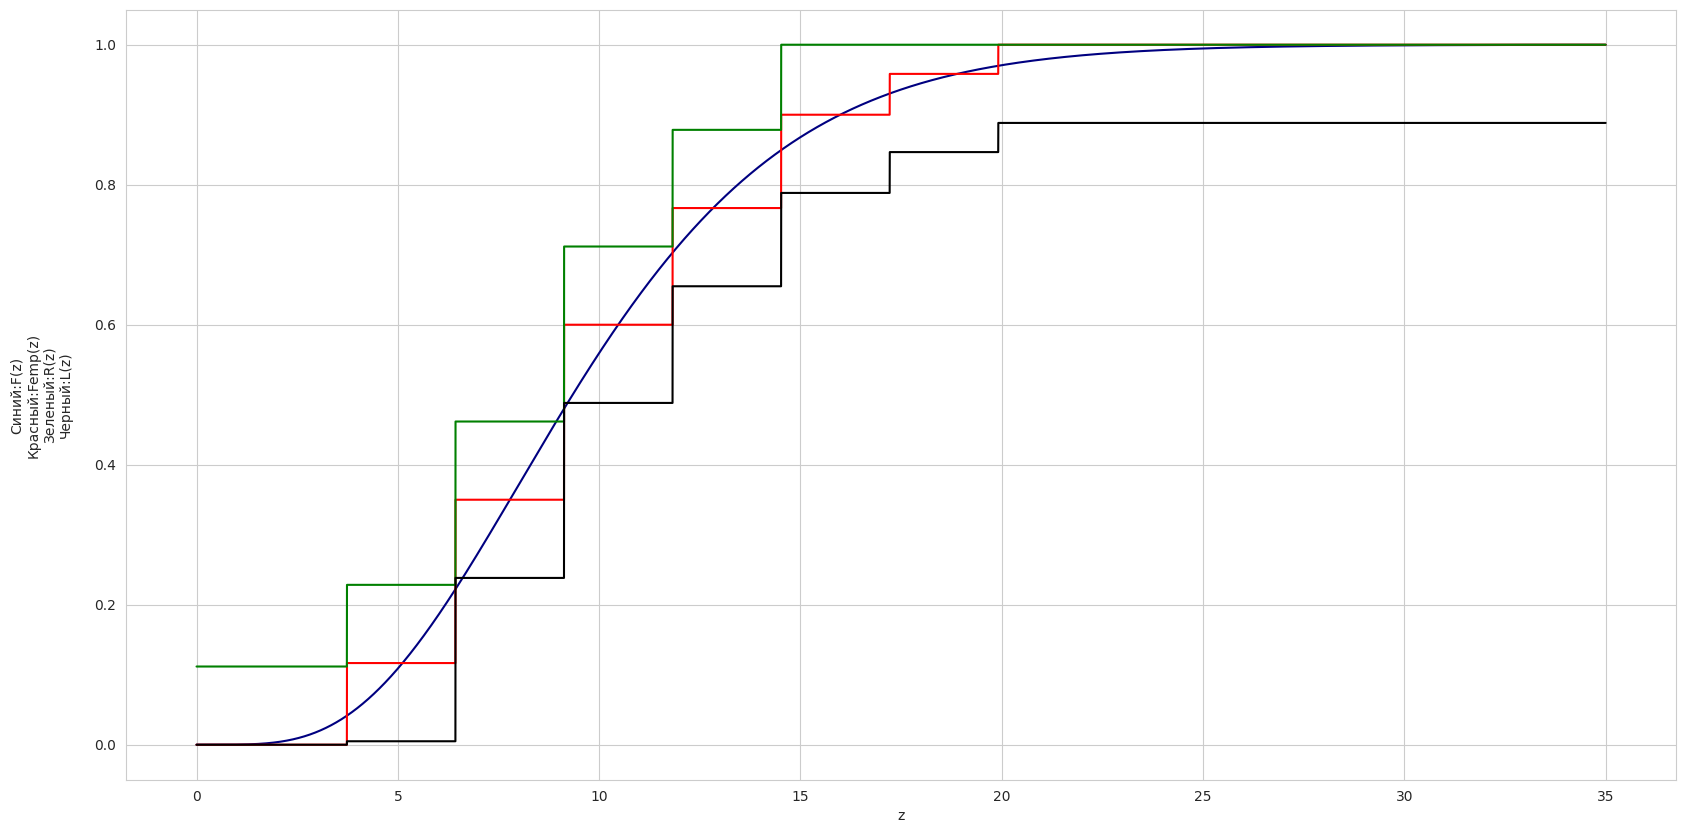

In [11]:
sb.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(x, F, color='navy')
plt.plot(x, Femp(x), color='red')
plt.plot(x, R(x), color='green')
plt.plot(x, L(x), color='black')
plt.xlabel("z")
plt.ylabel("Синий:F(z)\nКрасный:Femp(z)\nЗеленый:R(z)\nЧерный:L(z)\n")
plt.show()